### 追加

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')



In [4]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,1.133967,-3.183987,-0.154199,0.273696
1,0.909032,-1.340728,0.998442,-0.094456
2,-0.191750,-0.122993,-1.616036,0.825497
3,-2.280414,1.933142,0.476248,1.042591
4,0.582309,1.293148,-0.260585,-0.778472
5,0.756073,0.837518,-1.721467,0.564303
6,0.115771,-0.295328,-0.876071,0.827373
7,-1.214291,-1.886141,-0.180008,-0.061456


In [6]:
s = df.iloc[3]
s

A   -2.280414
B    1.933142
C    0.476248
D    1.042591
Name: 3, dtype: float64

In [10]:
df.append(s, ignore_index=True)

,A,B,C,D
0,1.133967,-3.183987,-0.154199,0.273696
1,0.909032,-1.340728,0.998442,-0.094456
2,-0.191750,-0.122993,-1.616036,0.825497
3,-2.280414,1.933142,0.476248,1.042591
4,0.582309,1.293148,-0.260585,-0.778472
5,0.756073,0.837518,-1.721467,0.564303
6,0.115771,-0.295328,-0.876071,0.827373
7,-1.214291,-1.886141,-0.180008,-0.061456
8,-2.280414,1.933142,0.476248,1.042591


## 组合

In [11]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
   ....:                           'foo', 'bar', 'foo', 'foo'],
   ....:                    'B' : ['one', 'one', 'two', 'three',
   ....:                           'two', 'two', 'one', 'three'],
   ....:                    'C' : np.random.randn(8),
   ....:                    'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.750358,0.627438
1,bar,one,-0.378597,0.386275
2,foo,two,-1.149072,-0.841815
3,bar,three,0.361209,1.070226
4,foo,two,-1.480545,0.733959
5,bar,two,0.198950,-0.185482
6,foo,one,-0.369593,0.013802
7,foo,three,-1.084084,0.529158


In [14]:
df.groupby('A').min()

,B,C,D
A,,,
bar,one,-0.378597,-0.185482
foo,one,-1.480545,-0.841815


In [15]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.378597  0.386275
    three  0.361209  1.070226
    two    0.198950 -0.185482
foo one   -1.119951  0.641240
    three -1.084084  0.529158
    two   -2.629617 -0.107856

## Reshaping
重构


In [16]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
   ....:                      'foo', 'foo', 'qux', 'qux'],
   ....:                     ['one', 'two', 'one', 'two',
   ....:                      'one', 'two', 'one', 'two']]))
   ....: 
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [17]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [19]:
df = pd.DataFrame(np.random.randn(8, 3)
                  , index=index
                  , columns=['A', 'B', 'C'])
df

A         B         C
first second                              
bar   one    -0.310332  1.066024  1.106739
      two     1.472868 -0.237099  1.039200
baz   one     0.484434  1.627280 -0.561872
      two    -2.027165 -0.188915  0.469904
foo   one     0.802141  1.399021 -0.315312
      two     0.817007 -0.490986 -0.533989
qux   one     1.111642 -0.037484 -0.014743
      two    -1.957748  1.420111  0.669356

In [22]:
df2 = df[:4]
df2

A         B         C
first second                              
bar   one    -0.310332  1.066024  1.106739
      two     1.472868 -0.237099  1.039200
baz   one     0.484434  1.627280 -0.561872
      two    -2.027165 -0.188915  0.469904

In [23]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.310332
               B    1.066024
               C    1.106739
       two     A    1.472868
               B   -0.237099
               C    1.039200
baz    one     A    0.484434
               B    1.627280
               C   -0.561872
       two     A   -2.027165
               B   -0.188915
               C    0.469904
dtype: float64

In [24]:
stacked.unstack()

A         B         C
first second                              
bar   one    -0.310332  1.066024  1.106739
      two     1.472868 -0.237099  1.039200
baz   one     0.484434  1.627280 -0.561872
      two    -2.027165 -0.188915  0.469904

In [28]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.310332  1.472868
      B  1.066024 -0.237099
      C  1.106739  1.039200
baz   A  0.484434 -2.027165
      B  1.627280 -0.188915
      C -0.561872  0.469904

In [32]:
stacked.bar.two.C

1.0391998826849498

### 透视表
> Pivot Tables

In [34]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
   .....:                    'B' : ['A', 'B', 'C'] * 4,
   .....:                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
   .....:                    'D' : np.random.randn(12),
   .....:                    'E' : np.random.randn(12)})
   .....: 
df

,A,B,C,D,E
0,one,A,foo,0.251697,1.328196
1,one,B,foo,0.138274,-0.961211
2,two,C,foo,0.006591,-0.386011
3,three,A,bar,-0.094330,2.375158
4,one,B,bar,-0.971657,-0.083041
5,one,C,bar,-0.107536,0.764591
6,two,A,foo,-0.398853,-0.477484
7,three,B,foo,-0.445205,1.038136
8,one,C,foo,-0.753304,-0.466474
9,one,A,bar,0.339849,0.371056


In [36]:
pd.pivot_table(df, values='E', index=['A', 'B'], columns=['C'])


C             bar       foo
A     B                    
one   A  0.371056  1.328196
      B -0.083041 -0.961211
      C  0.764591 -0.466474
three A  2.375158       NaN
      B       NaN  1.038136
      C  0.379010       NaN
two   A       NaN -0.477484
      B  0.947401       NaN
      C       NaN -0.386011

### 时间序列

In [46]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    23049
Freq: 5T, dtype: int64

In [47]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.152420
2012-03-07    0.721431
2012-03-08    1.105500
2012-03-09   -0.973896
2012-03-10    1.831843
Freq: D, dtype: float64

In [49]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.152420
2012-03-07 00:00:00+00:00    0.721431
2012-03-08 00:00:00+00:00    1.105500
2012-03-09 00:00:00+00:00   -0.973896
2012-03-10 00:00:00+00:00    1.831843
Freq: D, dtype: float64

In [58]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.152420
2012-03-06 19:00:00-05:00    0.721431
2012-03-07 19:00:00-05:00    1.105500
2012-03-08 19:00:00-05:00   -0.973896
2012-03-09 19:00:00-05:00    1.831843
Freq: D, dtype: float64

In [59]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.638111
2012-02-29    0.021846
2012-03-31    1.893442
2012-04-30   -0.422181
2012-05-31    0.251995
Freq: M, dtype: float64

In [60]:
ps = ts.to_period()
ps

2012-01   -0.638111
2012-02    0.021846
2012-03    1.893442
2012-04   -0.422181
2012-05    0.251995
Freq: M, dtype: float64

In [62]:
help(ts.to_period)

Help on method to_period in module pandas.core.series:

to_period(freq=None, copy=True) method of pandas.core.series.Series instance
    Convert Series from DatetimeIndex to PeriodIndex with desired
    frequency (inferred from index if not passed)
    
    Parameters
    ----------
    freq : string, default
    
    Returns
    -------
    ts : Series with PeriodIndex



In [63]:
ps.to_timestamp()

2012-01-01   -0.638111
2012-02-01    0.021846
2012-03-01    1.893442
2012-04-01   -0.422181
2012-05-01    0.251995
Freq: MS, dtype: float64

In [65]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00   -0.403923
1990-06-01 09:00    0.657217
1990-09-01 09:00   -0.265601
1990-12-01 09:00    2.097264
1991-03-01 09:00   -1.187161
Freq: H, dtype: float64

In [66]:
help(prng.asfreq)

Help on method asfreq in module pandas.core.indexes.period:

asfreq(freq=None, how='E') method of pandas.core.indexes.period.PeriodIndex instance
    Convert the PeriodIndex to the specified frequency `freq`.
    
    Parameters
    ----------
    
    freq : str
        a frequency
    how : str {'E', 'S'}
        'E', 'END', or 'FINISH' for end,
        'S', 'START', or 'BEGIN' for start.
        Whether the elements should be aligned to the end
        or start within pa period. January 31st ('END') vs.
        Janury 1st ('START') for example.
    
    Returns
    -------
    
    new : PeriodIndex with the new frequency
    
    Examples
    --------
    >>> pidx = pd.period_range('2010-01-01', '2015-01-01', freq='A')
    >>> pidx
    <class 'pandas.core.indexes.period.PeriodIndex'>
    [2010, ..., 2015]
    Length: 6, Freq: A-DEC
    
    >>> pidx.asfreq('M')
    <class 'pandas.core.indexes.period.PeriodIndex'>
    [2010-12, ..., 2015-12]
    Length: 6, Freq: M
    
    >>> pidx.

### Categoricals

In [74]:
df = pd.DataFrame({"id":[1,2,3,4,5,6]
                   , "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [76]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [77]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.set_categories(
        ["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [78]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [79]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 图表

In [3]:
ts = pd.Series(np.random.randn(1000)
               , index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.head()


2000-01-01   -0.695785
2000-01-02    0.838489
2000-01-03   -1.423750
2000-01-04    1.465232
2000-01-05    0.790878
Freq: D, dtype: float64

> 注意! 一定要事先配置就地显示...



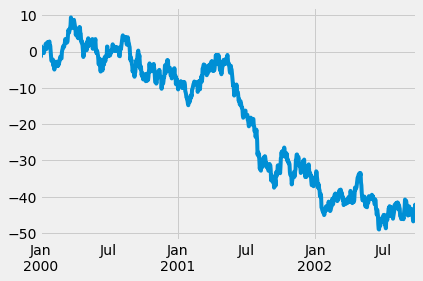

In [4]:
ts.plot()

In [5]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
   .....:                   columns=['A', 'B', 'C', 'D'])
   .....: 
df.head()

,A,B,C,D
2000-01-01,-0.831098,-0.113527,0.546355,-1.280147
2000-01-02,-0.532527,0.383957,-1.672096,0.549668
2000-01-03,-1.263119,0.376908,-1.651522,-0.221552
2000-01-04,-0.668690,-0.541001,0.796170,-0.524564
2000-01-05,-1.576872,-0.519211,0.639971,-0.017213


In [6]:
df = df.cumsum()

In [7]:
df.head()

,A,B,C,D
2000-01-01,-0.831098,-0.113527,0.546355,-1.280147
2000-01-02,-1.363625,0.270430,-1.125741,-0.730479
2000-01-03,-2.626744,0.647338,-2.777263,-0.952031
2000-01-04,-3.295434,0.106337,-1.981093,-1.476595
2000-01-05,-4.872306,-0.412874,-1.341122,-1.493808


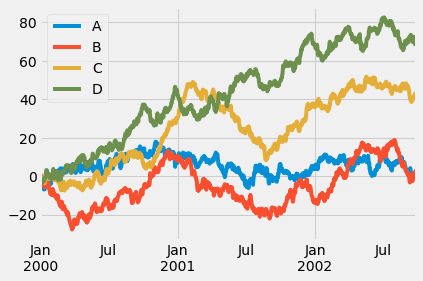

In [8]:
plt.figure()
df.plot()

plt.legend(loc='best')

## 输入/出

最常用的 ->excel

In [9]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')